In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [2]:
df = pd.read_csv("../data/adult.csv")
df_cleaned = df.replace("?", pd.NA).dropna()
df_cleaned["salary K$"] = pd.to_numeric(df_cleaned["salary K$"], errors="coerce")
valid_salary_values = ["<=50K", ">50K"]
if not df_cleaned["salary"].isin(valid_salary_values).all():
    print("incorrect data in 'salary'")

if df_cleaned["salary K$"].isna().any():
    print("incorrect data in 'salary K$'")

df_cleaned.head()

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


# Task 1
Print the count of men and women in the dataset.

In [5]:
men_count = df_cleaned[df_cleaned["sex"] == "Male"].shape[0]
women_count = df_cleaned[df_cleaned["sex"] == "Female"].shape[0]
print(f"Count of Men: {men_count}")
print(f"Count of Women: {women_count}")
men_count = df_cleaned["sex"].eq("Male").sum()
women_count = df_cleaned["sex"].eq("Female").sum()
print(f"second approach Count of Men: {men_count}")
print(f"second approach Count of Women: {women_count}")

Count of Men: 20380
Count of Women: 9782
second approach Count of Men: 20380
second approach Count of Women: 9782


# Task 2
Find the average age of men in dataset

In [6]:
average_age_men = df_cleaned[df_cleaned["sex"] == "Male"]["age"].mean()
print(f"Average Age of Men: {average_age_men:.2f}")

Average Age of Men: 39.18


# Task 3
Get the percentage of people from Poland (native-country)

In [13]:
total_count = df_cleaned["native-country"].count()
poland_count = df_cleaned["native-country"].eq("Poland").sum()
percentage_poland = (poland_count / total_count) * 100
print(f"Percentage of People from Poland: {percentage_poland:.2f}%")

Percentage of People from Poland: 0.19%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [14]:
mean_age_gt_50k = df_cleaned[df_cleaned["salary"] == ">50K"]["age"].mean()
std_age_gt_50k = df_cleaned[df_cleaned["salary"] == ">50K"]["age"].std()

mean_age_lte_50k = df_cleaned[df_cleaned["salary"] == "<=50K"]["age"].mean()
std_age_lte_50k = df_cleaned[df_cleaned["salary"] == "<=50K"]["age"].std()

print(f"Mean age for >50K: {mean_age_gt_50k:.2f}")
print(f"Standard deviation for >50K: {std_age_gt_50k:.2f}")
print(f"Mean age for <=50K: {mean_age_lte_50k:.2f}")
print(f"Standard deviation for <=50K: {std_age_lte_50k:.2f}")

Mean age for >50K: 43.96
Standard deviation for >50K: 10.27
Mean age for <=50K: 36.61
Standard deviation for <=50K: 13.46


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [15]:
high_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
rich_uneducated = df_cleaned[(df_cleaned["salary"] == ">50K") & (~df_cleaned["education"].isin(high_education))]
rich_uneducated

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [16]:
age_statistics_by_education = df_cleaned.groupby("education")["age"].describe()
age_statistics_by_education

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [19]:
men_df = df_cleaned[df_cleaned["sex"] == "Male"]

married_men = men_df[men_df["marital-status"].str.startswith("Married")]
non_married_men = men_df[~men_df["marital-status"].str.startswith("Married")]

married_men_salary = married_men["salary"].value_counts()
non_married_men_salary = non_married_men["salary"].value_counts()

print("Married:")
print(married_men_salary)
print("\nNot married:")
print(non_married_men_salary)

Married:
salary
<=50K    7052
>50K     5723
Name: count, dtype: int64

Not married:
salary
<=50K    6932
>50K      673
Name: count, dtype: int64


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [20]:
max_hours_per_week = df_cleaned["hours-per-week"].max()

people_with_max_hours = df_cleaned[df_cleaned["hours-per-week"] == max_hours_per_week].shape[0]

print(f"Max hours per week some person works: {max_hours_per_week}")
print(f"Number of people who work {max_hours_per_week} hours per week: {people_with_max_hours}")

Max hours per week some person works: 99
Number of people who work 99 hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

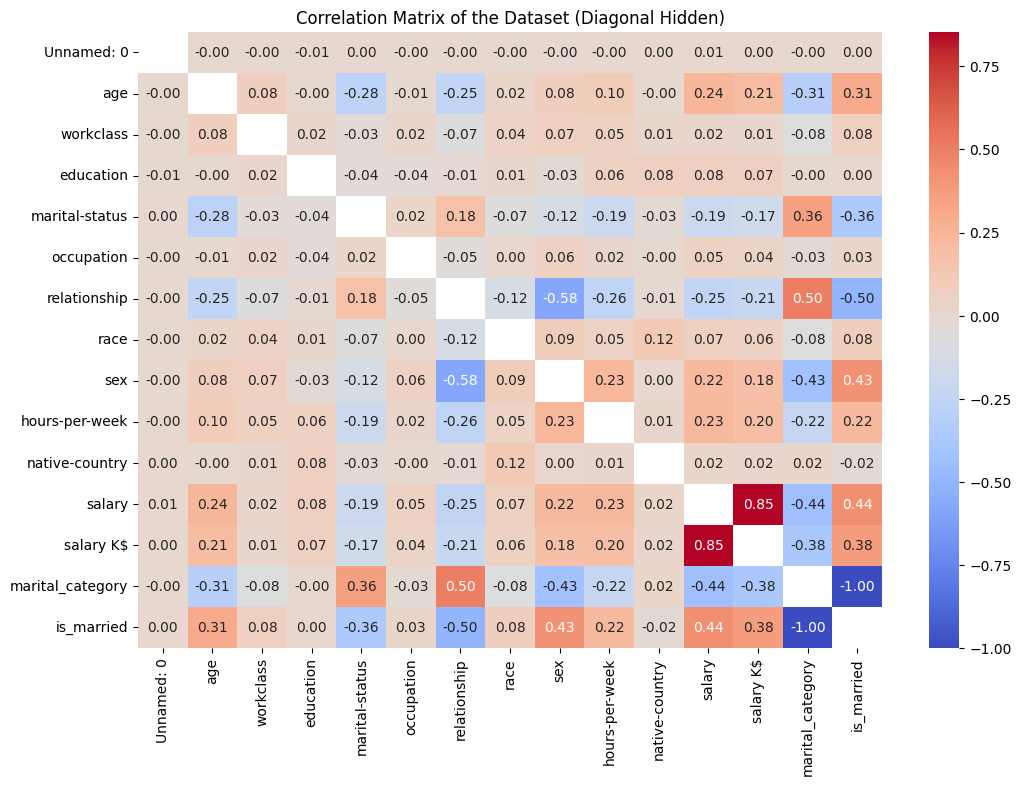

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df_cleaned.copy()
for column in df_numeric.select_dtypes(include=['object']).columns:
    df_numeric[column] = df_numeric[column].astype('category').cat.codes

correlation_matrix = df_numeric.corr()

mask = np.eye(correlation_matrix.shape[0], dtype=bool)
masked_corr_matrix = correlation_matrix.mask(mask)

plt.figure(figsize=(12, 8))
sns.heatmap(masked_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("Correlation Matrix of the Dataset (Diagonal Hidden)")
plt.show()
